In [108]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [151]:
def parser(text):
    Str = ""
    parser = []
    for i, line in enumerate(text):
        if i < 2:
            continue
        tmp = []
        for c in line:
            if c != ' ':
                Str += c
            else:
                if Str=="" or '\n' in Str or Str == 'thread':
                    Str = ""
                    continue
                tmp.append(Str)
                Str = ""
        parser.append(tmp)
        
    return parser

def avg_overhead(data):
    sum = 0.0
    for ov in data:
        num = float(ov.split('%')[0])
        sum += num
    return sum / len(data)

# 1. cache-ref-2p vs cache-ref-4p

In [93]:
cache_ref_2p = open('data/cache-ref-2p.txt', 'r', encoding='UTF-8')
cache_ref_4p = open('data/cache-ref-4p.txt', 'r', encoding='UTF-8')
cache_ref_2p_lines = cache_ref_2p.readlines()
cache_ref_4p_lines = cache_ref_4p.readlines()

### 1) 2p

In [97]:
p2_parser_result = parser(cache_ref_2p_lines)
print(p2_parser_result[:3])

[['21.54%', 'capture', '[kernel.kallsyms]', '[k]', 'copy_user_enhanced_fast_string'], ['18.57%', 'capture', 'libc-2.27.so', '[.]', '__memset_avx2_erms'], ['5.65%', 'capture', '[kernel.kallsyms]', '[k]', 'clear_page_erms']]


In [124]:
p2 = pd.DataFrame(p2_parser_result)
p2 = s.iloc[:,:2]
p2.columns = ['Overhead', 'Command']
p2

,Overhead,Command
0,21.54%,capture
1,18.57%,capture
2,5.65%,capture
3,3.97%,capture
4,3.90%,capture
5,0.98%,capture
6,0.80%,capture
7,0.66%,capture
8,0.64%,capture
9,0.45%,capture


In [105]:
Command_list = set(p2['Command'].values)
Command_list

{'QSGRenderThread',
 'capture',
 'frame',
 'vcap_thread',
 'vda_thread',
 'webrtc_audio_mo',
 'zlt.tid8350',
 'zlt.tid8351',
 'zlt.tid8352',
 'zlt.tid8353',
 'zoom'}

In [117]:
#p2 overhead average

avg_overhead(p2['Overhead'])

1.5169047619047613

In [133]:
p2_capture = p2[p2['Command'] == 'capture']
p2_capture

,Overhead,Command
0,21.54%,capture
1,18.57%,capture
2,5.65%,capture
3,3.97%,capture
4,3.90%,capture
5,0.98%,capture
6,0.80%,capture
7,0.66%,capture
8,0.64%,capture
9,0.45%,capture


In [134]:
# mean overhead of capture thread

avg_overhead(p2_capture['Overhead'].values)

3.448235294117646

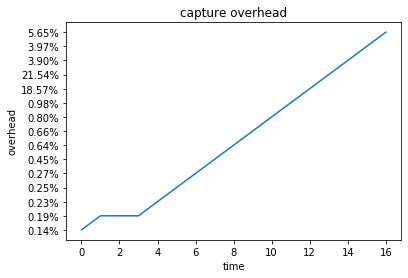

In [85]:
plt.plot([i for i in range(len(p2_capture['Overhead'].values))], sorted(p2_capture['Overhead'].values))
plt.title('capture overhead')
plt.xlabel('time')
plt.ylabel('overhead')
plt.show()

In [86]:
p2_zoom = p2[p2['Command'] == 'zoom']
p2_zoom

,Overhead,Command
31,0.17%,zoom
38,0.14%,zoom


In [128]:
# mean overhead of zoom thread

avg_overhead(p2_zoom['Overhead'].values)

0.15500000000000003

### 2) 4p

In [121]:
p4_parser_result = parser(cache_ref_4p_lines)
print(p4_parser_result[:3])

[['20.24%', 'capture', '[kernel.kallsyms]', '[k]', 'copy_user_enhanced_fast_string'], ['17.50%', 'capture', 'libc-2.27.so', '[.]', '__memset_avx2_erms'], ['5.45%', 'capture', '[kernel.kallsyms]', '[k]', 'clear_page_erms']]


In [123]:
p4 = pd.DataFrame(p4_parser_result)
p4 = s.iloc[:,:2]
p4.columns = ['Overhead', 'Command']
p4

,Overhead,Command
0,21.54%,capture
1,18.57%,capture
2,5.65%,capture
3,3.97%,capture
4,3.90%,capture
5,0.98%,capture
6,0.80%,capture
7,0.66%,capture
8,0.64%,capture
9,0.45%,capture


In [125]:
Command_list = set(p4['Command'].values)
Command_list

{'QSGRenderThread',
 'capture',
 'frame',
 'vcap_thread',
 'vda_thread',
 'webrtc_audio_mo',
 'zlt.tid8350',
 'zlt.tid8351',
 'zlt.tid8352',
 'zlt.tid8353',
 'zoom'}

In [135]:
avg_overhead(p4['Overhead'].values)

1.5169047619047613

In [138]:
p4_capture = p4[p4['Command'] == 'capture']
p4_capture

,Overhead,Command
0,21.54%,capture
1,18.57%,capture
2,5.65%,capture
3,3.97%,capture
4,3.90%,capture
5,0.98%,capture
6,0.80%,capture
7,0.66%,capture
8,0.64%,capture
9,0.45%,capture


In [141]:
avg_overhead(p4_capture['Overhead'].values)

3.448235294117646

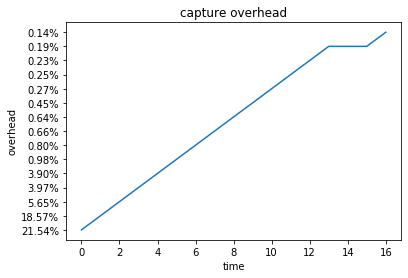

In [145]:
plt.plot([i for i in range(len(p4_capture['Overhead'].values))], (p4_capture['Overhead'].values))
plt.title('capture overhead')
plt.xlabel('time')
plt.ylabel('overhead')
plt.show()

In [146]:
p4_zoom = p4[p4['Command'] == 'zoom']
p4_zoom

,Overhead,Command
31,0.17%,zoom
38,0.14%,zoom


In [147]:
avg_overhead(p4_zoom['Overhead'].values)

0.15500000000000003

# 2. cpu-cycle 1p vs cpu-cycle 5p

In [150]:
cpu_cycle_1p = open('data/cpu-cycle-1p.txt', 'r', encoding='UTF-8')
cpu_cycle_5p = open('data/cpu-cycle-5p.txt', 'r', encoding='UTF-8')
cpu_cycle_1p_lines = cpu_cycle_1p.readlines()
cpu_cycle_5p_lines = cpu_cycle_5p.readlines()

### 1) 1p

In [153]:
p1_parser_result = parser(cpu_cycle_1p_lines)
print(p1_parser_result[:3])

[['19.31%', 'capture', 'libc-2.27.so', '[.]'], ['16.03%', 'capture', '[kernel.kallsyms]', '[k]'], ['6.31%', 'capture', '[kernel.kallsyms]', '[k]']]


In [154]:
p1 = pd.DataFrame(p1_parser_result)
p1 = s.iloc[:,:2]
p1.columns = ['Overhead', 'Command']

In [155]:
Command_list = set(p1['Command'].values)
Command_list

{'QSGRenderThread',
 'capture',
 'frame',
 'vcap_thread',
 'vda_thread',
 'webrtc_audio_mo',
 'zlt.tid8350',
 'zlt.tid8351',
 'zlt.tid8352',
 'zlt.tid8353',
 'zoom'}

In [158]:
p1

,Overhead,Command
0,21.54%,capture
1,18.57%,capture
2,5.65%,capture
3,3.97%,capture
4,3.90%,capture
5,0.98%,capture
6,0.80%,capture
7,0.66%,capture
8,0.64%,capture
9,0.45%,capture


In [157]:
avg_overhead(p1['Overhead'].values)

1.5169047619047613

In [159]:
p1_capture = p1[p1['Command'] == 'capture']
p1_capture

,Overhead,Command
0,21.54%,capture
1,18.57%,capture
2,5.65%,capture
3,3.97%,capture
4,3.90%,capture
5,0.98%,capture
6,0.80%,capture
7,0.66%,capture
8,0.64%,capture
9,0.45%,capture


In [160]:
avg_overhead(p1_capture['Overhead'].values)

3.448235294117646

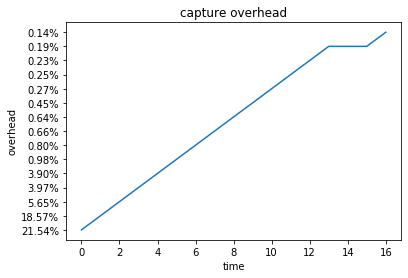

In [163]:
plt.plot([i for i in range(len(p1_capture['Overhead'].values))], (p1_capture['Overhead'].values))
plt.title('capture overhead')
plt.xlabel('time')
plt.ylabel('overhead')
plt.show()

In [161]:
p1_zoom = p1[p1['Command'] == 'zoom']
p1_zoom

,Overhead,Command
31,0.17%,zoom
38,0.14%,zoom


In [162]:
avg_overhead(p1_zoom['Overhead'].values)

0.15500000000000003

### 2) 5p

In [164]:
p5_parser_result = parser(cpu_cycle_5p_lines)
print(p5_parser_result[:3])

[['10.71%', 'capture', 'libc-2.27.so', '[.]'], ['8.82%', 'capture', '[kernel.kallsyms]', '[k]'], ['4.62%', 'vcap_thread', 'libturbojpeg.so', '[.]']]


In [165]:
p5 = pd.DataFrame(p5_parser_result)
p5 = s.iloc[:,:2]
p5.columns = ['Overhead', 'Command']

In [166]:
p5

,Overhead,Command
0,21.54%,capture
1,18.57%,capture
2,5.65%,capture
3,3.97%,capture
4,3.90%,capture
5,0.98%,capture
6,0.80%,capture
7,0.66%,capture
8,0.64%,capture
9,0.45%,capture


In [167]:
avg_overhead(p5['Overhead'].values)

1.5169047619047613

In [168]:
p5_capture = p5[p5['Command'] == 'capture']
p5_capture

,Overhead,Command
0,21.54%,capture
1,18.57%,capture
2,5.65%,capture
3,3.97%,capture
4,3.90%,capture
5,0.98%,capture
6,0.80%,capture
7,0.66%,capture
8,0.64%,capture
9,0.45%,capture


In [169]:
avg_overhead(p5_capture['Overhead'].values)

3.448235294117646

In [170]:
p5_zoom = p5[p5['Command'] == 'zoom']
p5_zoom

,Overhead,Command
31,0.17%,zoom
38,0.14%,zoom


In [171]:
avg_overhead(p5_zoom['Overhead'].values)

0.15500000000000003

# 3. mem-store-2p vs mem-store-5p

In [172]:
mem_store_2p = open('data/mem-store-2p.txt', 'r', encoding='UTF-8')
mem_store_5p = open('data/mem-store-5p.txt', 'r', encoding='UTF-8')
mem_store_2p_lines = mem_store_2p.readlines()
mem_store_5p_lines = mem_store_5p.readlines()

### 1) 2p

In [173]:
p2_parser_result = parser(mem_store_2p_lines)
print(p2_parser_result[:3])

p2 = pd.DataFrame(p2_parser_result)
p2 = s.iloc[:,:2]
p2.columns = ['Overhead', 'Command']

[['14.39%', 'capture', 'zoom', '[.]'], ['12.62%', 'capture', 'libc-2.27.so', '[.]'], ['6.01%', 'capture', '[kernel.kallsyms]', '[k]']]


In [174]:
p2

,Overhead,Command
0,21.54%,capture
1,18.57%,capture
2,5.65%,capture
3,3.97%,capture
4,3.90%,capture
5,0.98%,capture
6,0.80%,capture
7,0.66%,capture
8,0.64%,capture
9,0.45%,capture


In [175]:
avg_overhead(p2['Overhead'].values)

1.5169047619047613

In [176]:
p2_capture = p2[p2['Command'] == 'capture']
p2_capture

,Overhead,Command
0,21.54%,capture
1,18.57%,capture
2,5.65%,capture
3,3.97%,capture
4,3.90%,capture
5,0.98%,capture
6,0.80%,capture
7,0.66%,capture
8,0.64%,capture
9,0.45%,capture


In [177]:
avg_overhead(p2_capture['Overhead'].values)

3.448235294117646

In [178]:
p2_zoom = p2[p2['Command'] == 'zoom']
p2_zoom

,Overhead,Command
31,0.17%,zoom
38,0.14%,zoom


In [179]:
avg_overhead(p2_zoom['Overhead'].values)

0.15500000000000003

### 2) 5p

In [180]:
p5_parser_result = parser(mem_store_5p_lines)
print(p5_parser_result[:3])

p5 = pd.DataFrame(p5_parser_result)
p5 = s.iloc[:,:2]
p5.columns = ['Overhead', 'Command']

[['13.27%', 'capture', 'zoom', '[.]'], ['11.66%', 'capture', 'libc-2.27.so', '[.]'], ['5.62%', 'capture', '[kernel.kallsyms]', '[k]']]


In [181]:
p5

,Overhead,Command
0,21.54%,capture
1,18.57%,capture
2,5.65%,capture
3,3.97%,capture
4,3.90%,capture
5,0.98%,capture
6,0.80%,capture
7,0.66%,capture
8,0.64%,capture
9,0.45%,capture


In [182]:
avg_overhead(p5['Overhead'].values)

1.5169047619047613

In [184]:
p5_capture = p5[p5['Command'] == 'capture']
p5_capture

,Overhead,Command
0,21.54%,capture
1,18.57%,capture
2,5.65%,capture
3,3.97%,capture
4,3.90%,capture
5,0.98%,capture
6,0.80%,capture
7,0.66%,capture
8,0.64%,capture
9,0.45%,capture


In [185]:
avg_overhead(p5_capture['Overhead'].values)

3.448235294117646

In [186]:
p5_zoom = p5[p5['Command'] == 'zoom']
p5_zoom

,Overhead,Command
31,0.17%,zoom
38,0.14%,zoom


In [187]:
avg_overhead(p5_zoom['Overhead'].values)

0.15500000000000003